In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Keras
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation

# データの分割
from sklearn.model_selection import train_test_split

# MSE
from sklearn.metrics import mean_squared_error

# JupyterNotebook上でグラフを表示する設定
%matplotlib inline
# DataFrameで全ての列を表示する設定
pd.options.display.max_columns = None

In [5]:
dataset_base = pd.read_csv("data/baseball_salary.csv")
dataset_base.head()

,球団,推定年俸,守備,年数,年齢,身長,体重,血液型,投打,年,打率,試合,打席数,打数,安打,本塁打,打点,盗塁,四球,死球,三振,犠打,併殺打,出塁率,長打率,OPS,RC27,XR27,球団勝率,プレーオフ,球団平均得点,球団打率
0,c,21000,外野手,11,29,177,90,AB型,右左,2017,0.308,143,651,556,171,23,92,13,83,4,113,2,6,0.398,0.505,0.903,7.70,7.52,0.633,2,5.15,0.273
1,c,19000,内野手,7,28,171,72,A型,右右,2017,0.271,138,629,565,153,14,56,8,32,1,107,30,9,0.311,0.405,0.716,4.10,4.01,0.633,2,5.15,0.273
2,c,14000,内野手,5,29,171,85,A型,右左,2017,0.290,143,679,565,164,8,60,35,89,15,120,6,5,0.398,0.407,0.805,6.41,6.26,0.633,2,5.15,0.273
3,c,11500,内野手,7,38,196,126,不明,右右,2017,0.265,116,405,344,91,27,78,0,50,8,111,0,8,0.368,0.532,0.900,6.80,6.90,0.633,2,5.15,0.273
4,c,11000,内野手,20,41,189,102,B型,右右,2017,0.292,100,288,243,71,9,48,2,40,1,56,0,7,0.389,0.461,0.850,6.55,6.54,0.633,2,5.15,0.273


In [6]:
# 列の抜き出し
dataset = dataset_base[['推定年俸', '打点', '年数', '打率', '本塁打', '球団勝率']]

# 列名をリネームする
dataset = dataset.rename(columns={'推定年俸': 'salary', '打点': 'points', '年数': 'years_exp', '打率': 'batting', '本塁打': 'homerun', '球団勝率': 'team_win'})

dataset.head()

,salary,points,years_exp,batting,homerun,team_win
0,21000,92,11,0.308,23,0.633
1,19000,56,7,0.271,14,0.633
2,14000,60,5,0.290,8,0.633
3,11500,78,7,0.265,27,0.633
4,11000,48,20,0.292,9,0.633


In [7]:
# MinMaxScalerで正規化を実施
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
dataset_std = sc.fit_transform(dataset)
dataset_std.shape

(241, 6)

In [8]:
# 目的変数Y:dataset_stdの0列
Y = dataset_std[:, 0]

# 特徴量X:datastd_stdの1列目以降
X = dataset_std[:, 1:]
print("Y:", Y.shape)
print("X:", X.shape)

Y: (241,)
X: (241, 5)


In [9]:
# データの分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)


In [10]:
# 形状を確認
print("Y_train=", Y_train.shape, ", X_train=", X_train.shape)
print("Y_valid=", Y_valid.shape, ", X_valid=", X_valid.shape)
print("Y_test=", Y_test.shape, ", X_test=", X_test.shape)

Y_train= (117,) , X_train= (117, 5)
Y_valid= (51,) , X_valid= (51, 5)
Y_test= (73,) , X_test= (73, 5)


In [11]:
# モデルの初期化
model = keras.Sequential()
# 入力層
model.add(Dense(8, activation='relu', input_shape=(5,)))
# 隠れ層
model.add(Dense(8, activation='relu'))
# 出力層
model.add(Dense(1))
# モデルの構築
model.compile(optimizer = "rmsprop", loss='mse', metrics=['mae'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
# モデルの構造を表示
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 48        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [13]:
%%time
# 学習の実施（少々時間がかかります）
log = model.fit(X_train, Y_train, epochs=500, batch_size=48, verbose=True,
         validation_data=(X_valid, Y_valid))

00 - mean_absolute_error: 0.0620 - val_loss: 0.0227 - val_mean_absolute_error: 0.0715
Epoch 4886/5000
117/117 [==============================] - 0s 214us/sample - loss: 0.0100 - mean_absolute_error: 0.0605 - val_loss: 0.0231 - val_mean_absolute_error: 0.0703
Epoch 4887/5000
117/117 [==============================] - 0s 163us/sample - loss: 0.0100 - mean_absolute_error: 0.0600 - val_loss: 0.0226 - val_mean_absolute_error: 0.0717
Epoch 4888/5000
117/117 [==============================] - 0s 171us/sample - loss: 0.0100 - mean_absolute_error: 0.0604 - val_loss: 0.0222 - val_mean_absolute_error: 0.0736
Epoch 4889/5000
117/117 [==============================] - 0s 154us/sample - loss: 0.0102 - mean_absolute_error: 0.0626 - val_loss: 0.0224 - val_mean_absolute_error: 0.0721
Epoch 4890/5000
117/117 [==============================] - 0s 291us/sample - loss: 0.0100 - mean_absolute_error: 0.0613 - val_loss: 0.0234 - val_mean_absolute_error: 0.0698
Epoch 4891/5000
117/117 [========================

In [15]:
# 予測はpredict
Y_pred = model.predict(X_test)

In [15]:
# 正規化した値を元に戻すにはinverse_transformを使う
# 行列の形はdataと一致している必要があるため、XとYを結合させる
Y_test_ = sc.inverse_transform(np.hstack([Y_test.reshape(len(Y_test), 1), X_test]))[:, 0]
Y_pred_ = sc.inverse_transform(np.hstack([Y_pred.reshape(len(Y_pred), 1), X_test]))[:, 0]

In [17]:
# MSE(平均二条誤差)を算出
mse = mean_squared_error(Y_test_, Y_pred_)
print('MSE(Keras回帰モデル):', mse)

MSE(Keras回帰モデル): 71672943.01209971


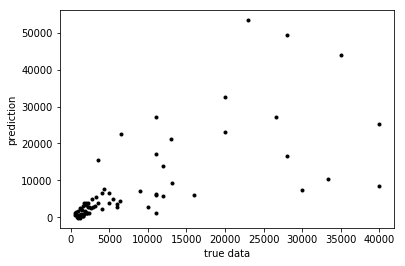

In [18]:
# 散布図の表示
plt.plot(Y_test_, Y_pred_, 'k.')
plt.xlabel("true data")
plt.ylabel("prediction")
plt.show()

## ディープラーニングのモデルを作ってみよう！～二値分類モデル

In [25]:
from sklearn.datasets import load_iris
iris = load_iris()

In [26]:
# irisのfeature_namesは「sepal length(cm)」のように空白やカッコが付いていて扱いづらいので以下の列名を使用する
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# datasetの作成
dataset = pd.DataFrame(data = iris['data'], columns = feature_names)
dataset['species'] = iris['target']
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
# setosaかそれ以外か
is_setosa = (dataset['species'] == 0).astype(np.int64)

# datasetに追加
dataset['is_setosa'] = is_setosa
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species,is_setosa
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [28]:
# 目的変数（Y)：is_setosa、説明変数（X)：petal_widthとpetal_length
Y = np.array(dataset['is_setosa'])
X = np.array(dataset[['petal_width', 'petal_length']])

In [29]:
# 形状を確認
print("Y=", Y.shape, ", X=", X.shape)

Y= (150,) , X= (150, 2)


In [30]:
# データの分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [31]:
# 形状を確認
print("Y_train=", Y_train.shape, ", X_train=", X_train.shape)
print("Y_valid=", Y_valid.shape, ", X_valid=", X_valid.shape)
print("Y_test=", Y_test.shape, ", X_test=", X_test.shape)

Y_train= (73,) , X_train= (73, 2)
Y_valid= (32,) , X_valid= (32, 2)
Y_test= (45,) , X_test= (45, 2)


In [32]:
# モデルの初期化
model = keras.Sequential()

# 入力層
model.add(Dense(8, activation='relu', input_shape=(2,)))
# 隠れ層
model.add(Dense(8, activation='relu'))
# 出力層
model.add(Dense(1, activation='sigmoid'))

# モデルの構築
model.compile(optimizer = "rmsprop", loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [33]:
# モデルの構造を表示
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [34]:
%%time
# 学習の実施
log = model.fit(X_train, Y_train, epochs=500, batch_size=32, verbose=True,
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                         min_delta=0, patience=100,
                                                         verbose=1)],
         validation_data=(X_valid, Y_valid))

 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 363/500
73/73 [==============================] - 0s 165us/sample - loss: 4.9012e-04 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 364/500
73/73 [==============================] - 0s 165us/sample - loss: 4.7151e-04 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 365/500
73/73 [==============================] - 0s 179us/sample - loss: 4.6197e-04 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 366/500
73/73 [==============================] - 0s 203us/sample - loss: 4.4847e-04 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 367/500
73/73 [==============================] - 0s 255us/sample - loss: 4.3389e-04 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 368/500
73/73 [==============================] - 0s 248us/sample - loss: 4.2196e-04 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 369/500
73/73 [==============================] - 0s 244us/sample - loss: 4.1036e-04 - acc: 1.000

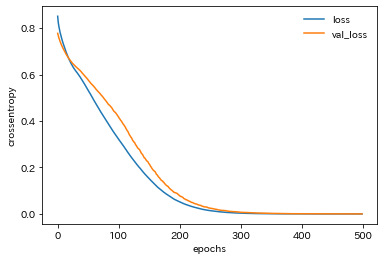

In [35]:
# グラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) # 凡例の表示
plt.xlabel("epochs")
plt.ylabel("crossentropy")
plt.show()

In [56]:
# predictで予測を行う
Y_pred = model.predict(X_test)

# 二値分類は予測結果の確率が0.5以下なら0,
# それより大きければ1となる計算で求める
Y_pred_cls = (Y_pred > 0.5).astype("int32")

Y_pred[:10]

array([[1.3484350e-16, 2.7959052e-04, 9.9972039e-01],
       [2.4048607e-06, 9.9916506e-01, 8.3253224e-04],
       [9.9999571e-01, 4.2690631e-06, 9.0751093e-15],
       [2.2498728e-16, 2.4163786e-03, 9.9758363e-01],
       [9.9994934e-01, 5.0656359e-05, 1.4394102e-12],
       [5.0127797e-19, 4.8920774e-05, 9.9995112e-01],
       [9.9996030e-01, 3.9641684e-05, 9.5331165e-13],
       [8.5867953e-08, 9.9737060e-01, 2.6292065e-03],
       [1.9111370e-08, 9.9068928e-01, 9.3106944e-03],
       [6.4863998e-06, 9.9973661e-01, 2.5691779e-04]], dtype=float32)

In [38]:
# 形状を正解（目的変数）に合わせる
Y_pred_ = Y_pred_cls.reshape(-1)

In [39]:
# モデルの評価
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        16

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## ディープラーニングのモデルを作ってみよう！～多クラス分類モデル

In [40]:
# 目的変数をカテゴリー変数に展開する
dataset2 = pd.get_dummies(data=dataset, columns=['species'])
dataset2.head()

,sepal_length,sepal_width,petal_length,petal_width,is_setosa,species_0,species_1,species_2
0,5.1,3.5,1.4,0.2,1,1,0,0
1,4.9,3.0,1.4,0.2,1,1,0,0
2,4.7,3.2,1.3,0.2,1,1,0,0
3,4.6,3.1,1.5,0.2,1,1,0,0
4,5.0,3.6,1.4,0.2,1,1,0,0


In [41]:
# Y:目的変数、X:説明変数
Y = np.array(dataset2[['species_0', 'species_1', 'species_2']])
X = np.array(dataset2[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [42]:
# データの分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [43]:
# モデルの初期化
model = keras.Sequential()

# 入力層
model.add(Dense(16, activation='relu', input_shape=(4,)))
# 隠れ層
model.add(Dense(16, activation='relu'))
# 出力層
model.add(Dense(3, activation='softmax'))

# モデルの構築
model.compile(optimizer = "rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
%%time
# 学習の実施
log = model.fit(X_train, Y_train, epochs=500, batch_size=32, verbose=True,
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                         min_delta=0, patience=100,
                                                         verbose=1)],
         validation_data=(X_valid, Y_valid))

[==============================] - 0s 220us/sample - loss: 0.0765 - acc: 0.9589 - val_loss: 0.0277 - val_acc: 1.0000
Epoch 356/500
73/73 [==============================] - 0s 179us/sample - loss: 0.0704 - acc: 0.9726 - val_loss: 0.0217 - val_acc: 1.0000
Epoch 357/500
73/73 [==============================] - 0s 275us/sample - loss: 0.0829 - acc: 0.9315 - val_loss: 0.0170 - val_acc: 1.0000
Epoch 358/500
73/73 [==============================] - 0s 220us/sample - loss: 0.0682 - acc: 0.9726 - val_loss: 0.0160 - val_acc: 1.0000
Epoch 359/500
73/73 [==============================] - 0s 275us/sample - loss: 0.0771 - acc: 0.9589 - val_loss: 0.0168 - val_acc: 1.0000
Epoch 360/500
73/73 [==============================] - 0s 206us/sample - loss: 0.0672 - acc: 0.9726 - val_loss: 0.0436 - val_acc: 0.9688
Epoch 361/500
73/73 [==============================] - 0s 275us/sample - loss: 0.0843 - acc: 0.9452 - val_loss: 0.0229 - val_acc: 1.0000
Epoch 362/500
73/73 [==============================] - 0s 192

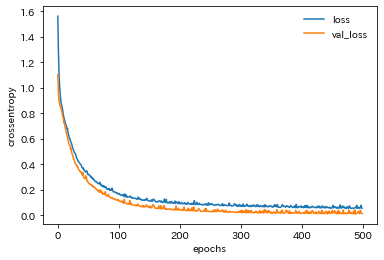

In [45]:
# グラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) # 凡例の表示
plt.xlabel("epochs")
plt.ylabel("crossentropy")
plt.show()

In [46]:
# predictで予測を行う
Y_pred_0 = model.predict(X_test)

# 多クラス分類は予測結果の各リストにおける
# 最大値のインデックスを取得するようにする
Y_pred = np.argmax(Y_pred_0, axis=1)

In [47]:
# カテゴリー変数の復元
Y_test_ = np.argmax(Y_test, axis=1)

In [48]:
# モデルの評価
from sklearn.metrics import classification_report

print(classification_report(Y_test_, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

